In [1]:
from simulator import Simulator
from scipy import stats

#### 简单的描述：

这个simulator的输入有三部分：

1. transaction_generator，一个生成函数，每次调用会生成一个随机交易，要求返回金额，手续费（数额而不是百分比），此次交易和上次的间隔时间。
2. mu_generator，一个生成函数，每次调用会生成一个产生block的间隔时间
3. K是block的大小

定义好了Simulator，调用run函数开始模拟，duration参数指定时间（单位是分钟）。运行完成后可以用simulator的plot函数画图。下面的例子是basic版本的model

In [27]:
def transaction_generator():
    """
    Define a transaction generator, it should return 3 value, the transaction amount, fee 
    and an inter-arrival time. Notice that the unit for time is minute.
    """
    # Uniform transaction amount between 5, 25.
    amount = stats.uniform.rvs() * 20 + 5
    # Binomial transaction fee of 1% * amount or 2% * amount
    fee = amount * (stats.binom.rvs(1, 0.5) / 100 + 0.01)
    # Exponential inter-arrival time of 2 transaction / minute
    inter_arrival_time = stats.expon.rvs(scale = 0.5)
    return amount, fee, inter_arrival_time

def mu_generator():
    """
    Define a block event generator, it should return a random value of an inter-arrival time for block
    generation.
    """
    # Exponential inter-arrival time of 0.5 block / minute
    return stats.expon.rvs(scale = 2)

simulator = Simulator(transaction_generator, mu_generator, K=10)
simulator.run(duration=5000, warm_up=1000)

目前支持以下response的画图：
'all_transaction_amount', 'all_transaction_count',
'all_transaction_fee', 'block', 'delay', 'finished_transaction_amount',
'finished_transaction_count', 'finished_transaction_fee',
'pending_transaction_amount', 'pending_transaction_count',
'pending_transaction_fee', 'average_delay',
'average_transaction_amount', 'average_transaction_fee',
'average_pending_transaction_amount', 'average_pending_transaction_fee',
'average_finished_transaction_amount',
'average_finished_transaction_fee', 'average_block_size',
'average_block_amount', 'average_block_fee'

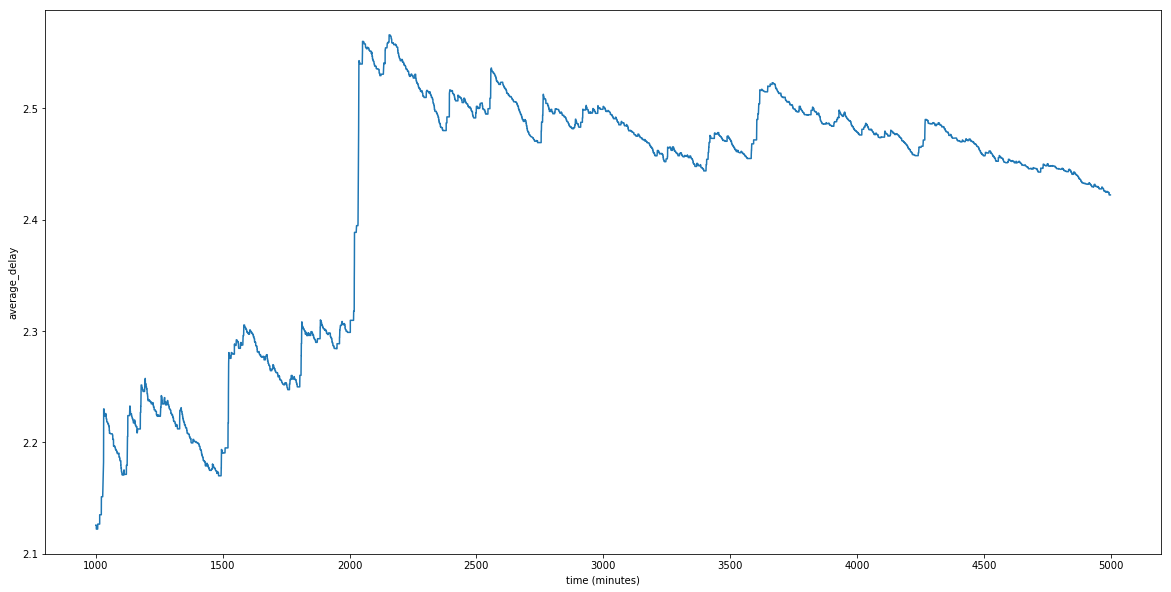

In [29]:
simulator.plot('average_delay')